# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Erlis Maulidiyah Rizqiyani]
- **Email:** [erlisrizqiyani@student.ub.ac.id]
- **ID Dicoding:** [erlis_maulidiyah_rizqiyani_QCmJ]

## Menentukan Pertanyaan Bisnis

- How does the geographical distribution of customers (based on customer_city or customer_state) affect the number of orders?
- What product categories show significant sales growth?
- How is the Shipping Duration Distribution from Purchase to Delivery?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data 📢

In [3]:
customer_df = pd.read_csv("data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [132]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
orderitems_df = pd.read_csv("data/order_items_dataset.csv")
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orderpayments_df = pd.read_csv("data/order_payments_dataset.csv")
orderpayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
orderreviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orderreviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [112]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
catname_df = pd.read_csv("data/product_category_name_translation.csv")
catname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data 📑

##### Customers Dataframe Structure

In [14]:
print("Customer's DataFrame Information:")
print(customer_df.info())

Informasi Customer DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [16]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [57]:
print("Total Duplicate Data: ", customer_df.duplicated().sum())
customer_df.describe()

Total Duplicate Data:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Geolocation Dataframe Structure 

In [133]:
print("Geolocation's DataFrame Information:")
print(geolocation_df.info())

Geolocation's DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None


In [134]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [135]:
print("Total Duplicate Data: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Total Duplicate Data:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


##### Order Items Dataframe Structure

In [27]:
print("Order Items' DataFrame Information:")
print(orderitems_df.info())

Order Items' DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [28]:
orderitems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [66]:
print("Total Duplicate Data: ", orderitems_df.duplicated().sum())
orderitems_df.describe()

Total Duplicate Data:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Order Payments Dataframe Structure

In [30]:
print("Order Payments' DataFrame Information:")
print(orderpayments_df.info())

Order Payments' DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [31]:
orderpayments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [67]:
print("Total Duplicate Data: ", orderpayments_df.duplicated().sum())
orderpayments_df.describe()

Total Duplicate Data:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Order Reviews Dataframe Structure 

In [33]:
print("Order Reviews' DataFrame Information:")
print(orderreviews_df.info())

Order Reviews' DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [34]:
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [68]:
print("Total Duplicate Data : ", orderreviews_df.duplicated().sum())
orderreviews_df.describe()

Total Duplicate Data :  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Orders Dataframe Structure 

In [113]:
print("Orders' DataFrame Information:")
print(orders_df.info())

Orders' DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


In [114]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [115]:
print("Total Duplicate Data : ", orders_df.duplicated().sum())
orders_df.describe()

Total Duplicate Data :  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Catname Translation Dataframe Structure

In [39]:
print("Catname Translation's DataFrame Information:")
print(catname_df.info())

Catname Translation's DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


In [40]:
catname_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [72]:
print("Total Duplicate Data : ", catname_df.duplicated().sum())
catname_df.describe()

Total Duplicate Data :  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Products Dataframe Structure 

In [42]:
print("Products' DataFrame Information:")
print(products_df.info())

Products' DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


In [43]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [74]:
print("Total Duplicate Data : ", products_df.duplicated().sum())
products_df.describe()

Total Duplicate Data :  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [55]:
products_rows_with_null = products_df[products_df.isna().any(axis=1)]
products_rows_with_null.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


##### Sellers Dataframe Structure

In [45]:
print("Sellers' DataFrame Information:")
print(sellers_df.info())

Sellers' DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None


In [46]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [75]:
print("Total Duplicate Data : ", sellers_df.duplicated().sum())
sellers_df.describe()

Total Duplicate Data :  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data 🧼

##### Cleaning **Geolocation Dataframe**

In [144]:
print("Total Duplicate Data : ", geolocation_df.duplicated().sum())

Total Duplicate Data :  261831


In [145]:
geolocation_duplicate_rows = geolocation_df[geolocation_df.duplicated()]
geolocation_duplicate_rows.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [146]:
geolocation_df.drop_duplicates(keep='first', inplace=True)

In [147]:
print("Total Duplicate Data After Cleaning : ", geolocation_df.duplicated().sum())

Total Duplicate Data After Cleaning :  0


##### Cleaning **Order Reviews Dataframe**

In [82]:
orderreviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [94]:
print("Review Score")
print("5 : ", orderreviews_df[orderreviews_df['review_score'] == 5]['review_comment_title'].value_counts().idxmax())
print("4 : ", orderreviews_df[orderreviews_df['review_score'] == 4]['review_comment_title'].value_counts().idxmax())
print("3 : ", orderreviews_df[orderreviews_df['review_score'] == 3]['review_comment_title'].value_counts().idxmax())
print("2 : ", orderreviews_df[orderreviews_df['review_score'] == 2]['review_comment_title'].value_counts().idxmax())
print("1 : ", orderreviews_df[orderreviews_df['review_score'] == 1]['review_comment_title'].value_counts().idxmax())


Review Score
5 :  Recomendo
4 :  Recomendo
3 :  Bom
2 :  Ruim
1 :  Não recomendo


In [95]:
orderreviews_df['review_comment_title'] = orderreviews_df.apply(
    lambda row: 'Recomendo' if row['review_score'] in [4, 5]
    else ('Bom' if row['review_score'] == 3
        else ('Ruim' if row['review_score'] == 2
            else 'Não recomendo')),
    axis=1
)

In [100]:
print("After setting missing values according to the score :")
print("review_comment_title : ", orderreviews_df.review_comment_title.isna().sum()) 

After setting missing values according to the score :
review_comment_title :  0


In [98]:
orderreviews_df['review_comment_message'] = orderreviews_df.apply(
    lambda row: 'Recomendo' if row['review_score'] in [4, 5]
    else ('Bom' if row['review_score'] == 3
        else ('Ruim' if row['review_score'] == 2
            else 'Não recomendo')),
    axis=1
)

In [101]:
print("After setting missing values according to the score :")
print("review_comment_message : ", orderreviews_df.review_comment_title.isna().sum()) 

After setting missing values according to the score :
review_comment_message :  0


##### Cleaning **Orders Dataframe**

In [116]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [117]:
order_rows_with_null = orders_df[orders_df.isna().any(axis=1)]
order_rows_with_null.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


🔴handling *order_approved_at* missing value

In [119]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

time_diff = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
avg_time_diff = time_diff.mean()
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'] + avg_time_diff, inplace=True)

print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


🔴handling *order_delivered_carrier_date* missing value

In [122]:
time_diff_carrier = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
avg_time_diff_carrier = time_diff_carrier.mean()
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + avg_time_diff_carrier, inplace=True)

print(orders_df.isna().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [123]:
selected_order = orders_df.loc[orders_df['order_id'] == '136cce7faa42fdb2cefd53fdc79a6098']
print(selected_order.to_markdown(index=False))

| order_id                         | customer_id                      | order_status   | order_purchase_timestamp   | order_approved_at   | order_delivered_carrier_date   | order_delivered_customer_date   | order_estimated_delivery_date   |
|:---------------------------------|:---------------------------------|:---------------|:---------------------------|:--------------------|:-------------------------------|:--------------------------------|:--------------------------------|
| 136cce7faa42fdb2cefd53fdc79a6098 | ed0271e0b7da060a393796590e7b737a | invoiced       | 2017-04-11 12:22:08        | 2017-04-13 13:25:17 | 2017-04-16 08:44:50.954644239  | NaT                             | 2017-05-09 00:00:00             |


🔴handling *order_delivered_customer_date* missing value

In [124]:
time_diff_customer = orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
avg_time_diff_customer = time_diff_customer.mean()
orders_df['order_delivered_customer_date'].fillna(orders_df['order_estimated_delivery_date'] + avg_time_diff_customer, inplace=True)

print(orders_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [125]:
selected_order = orders_df.loc[orders_df['order_id'] == '136cce7faa42fdb2cefd53fdc79a6098']
print(selected_order.to_markdown(index=False))

| order_id                         | customer_id                      | order_status   | order_purchase_timestamp   | order_approved_at   | order_delivered_carrier_date   | order_delivered_customer_date   | order_estimated_delivery_date   |
|:---------------------------------|:---------------------------------|:---------------|:---------------------------|:--------------------|:-------------------------------|:--------------------------------|:--------------------------------|
| 136cce7faa42fdb2cefd53fdc79a6098 | ed0271e0b7da060a393796590e7b737a | invoiced       | 2017-04-11 12:22:08        | 2017-04-13 13:25:17 | 2017-04-16 08:44:50.954644239  | 2017-04-27 19:42:04.042383598   | 2017-05-09 00:00:00             |


##### Cleaning **Products Dataframe**

In [126]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [149]:
missing_rows = products_df[products_df.isna().any(axis=1)]
missing_rows.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [151]:
products_df['product_weight_g'].fillna(products_df['product_weight_g'].median(), inplace  = True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].median(), inplace  = True)

In [152]:
prod_orders_items = orders_df.merge(orderitems_df, on = 'order_id', how = 'left')
prod_orders_items = prod_orders_items.merge(products_df, on = 'product_id', how = 'left')

In [153]:
prod_orders_items.merge(products_df, on = 'product_id', how = 'left')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm_x,product_width_cm_x,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,10.0,20.0,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,15.0,15.0,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,10.0,40.0,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,1.0,b80910977a37536adeddd63663f916ad,...,90.0,22.0,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,20.0,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,20.0,20.0,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [154]:
prod_orders_items.duplicated('order_id').sum()

13984

In [156]:
prod_orders_items[prod_orders_items['order_id'] == "e6ce16cb79ec1d90b1da9085a6118aeb"].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,1.0,08574b074924071f4e201e151b152b4e,...,99.0,30.53,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0
11,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,2.0,08574b074924071f4e201e151b152b4e,...,99.0,30.53,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0


In [158]:
prod_orders_items = prod_orders_items.drop_duplicates('order_id', keep='first')
prod_orders_items.duplicated('order_id').sum()

0

In [160]:
prod_orders_items.duplicated().sum()

0

##### Merge and Convert to CSV

In [188]:
main_data = pd.merge(prod_orders_items, orderpayments_df, on='order_id')

In [189]:
main_data = pd.merge(main_data, orderreviews_df, on='order_id')

In [190]:
main_data = pd.merge(main_data, sellers_df, on='seller_id')

In [194]:
main_data = pd.merge(main_data, customer_df, on='customer_id')

In [196]:
main_data = pd.merge(main_data, catname_df, on='product_category_name')

In [201]:
main_data.duplicated().sum()

0

In [ ]:
main_data.to_csv('dashboard/main_data.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore 🎯

How does the geographical distribution of customers (based on customer_city or customer_state) affect the number of orders?


In [162]:
merged_orders_customer = pd.merge(prod_orders_items, customer_df, on='customer_id')
orders_by_city = merged_orders_customer.groupby('customer_city')['order_id'].count().sort_values(ascending=False)

orders_by_city.head()

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: order_id, dtype: int64

What product categories show significant sales growth?

In [165]:
merged_orderitems_products = pd.merge(prod_orders_items, catname_df, on='product_category_name')

sales_by_category = merged_orderitems_products.groupby('product_category_name_english')['order_id'].count()
initial_sales = sales_by_category.copy()

sales_by_category.head()

product_category_name_english
agro_industry_and_commerce    182
air_conditioning              252
art                           198
arts_and_craftmanship          22
audio                         346
Name: order_id, dtype: int64

How is the Shipping Duration Distribution from Purchase to Delivery?

In [178]:
merged_orders_customer['shipping_duration'] = merged_orders_customer['order_delivered_customer_date'] - merged_orders_customer['order_purchase_timestamp']
merged_orders_customer['shipping_duration_days'] = merged_orders_customer['shipping_duration'].dt.days

## Visualization & Explanatory Analysis

### Question 1: How does the geographical distribution of customers affect the number of orders?

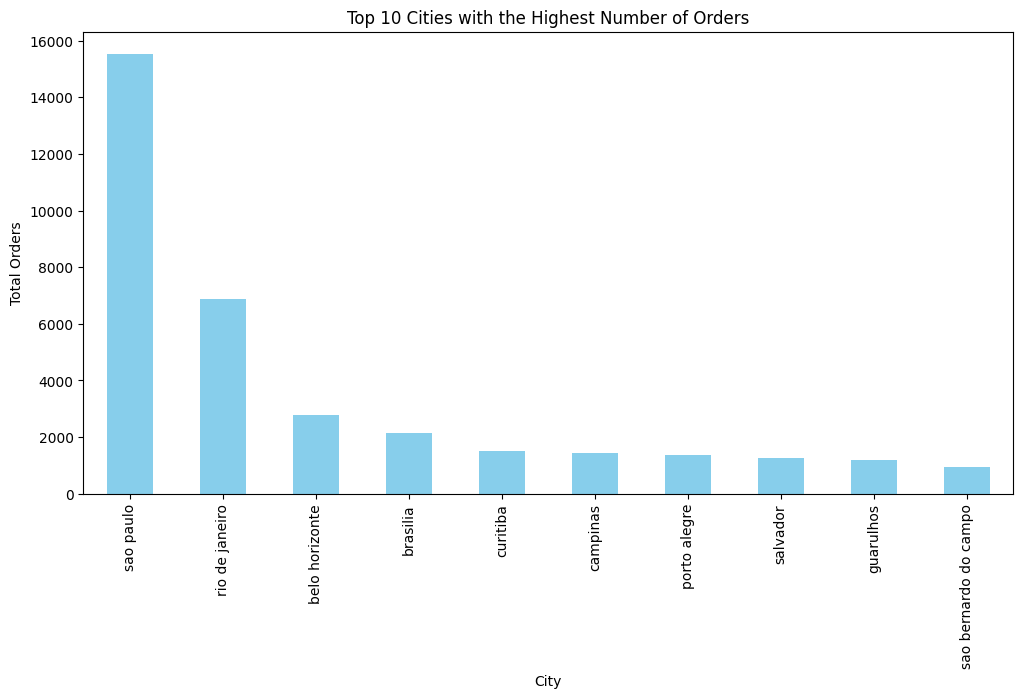

In [184]:
plt.figure(figsize=(12, 6))
orders_by_city[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Highest Number of Orders')
plt.xlabel('City')
plt.ylabel('Total Orders')
plt.show()

### Question 2: What product categories show significant sales growth?

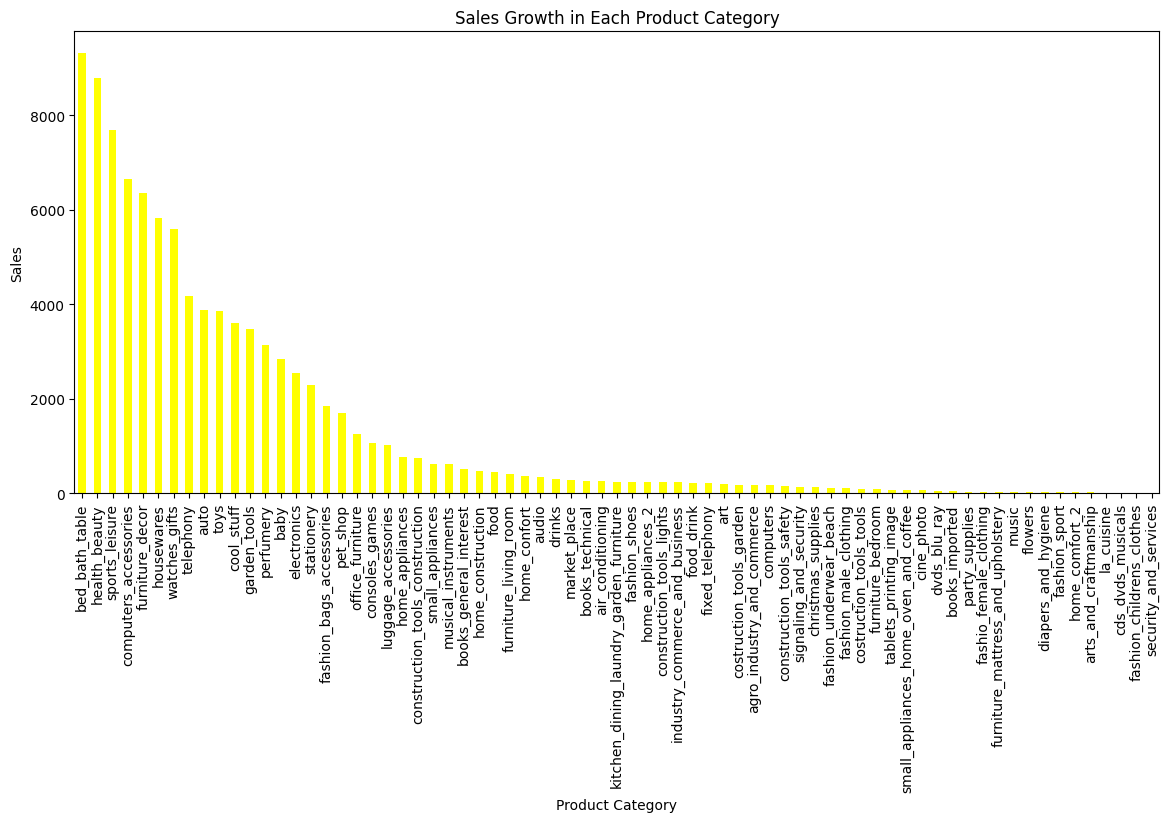

In [186]:
sorted_sales_by_category = sales_by_category.sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sorted_sales_by_category.plot(kind='bar', color='yellow')
plt.title('Sales Growth in Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.show()


### Question 3: How is the Shipping Duration Distribution from Purchase to Delivery?

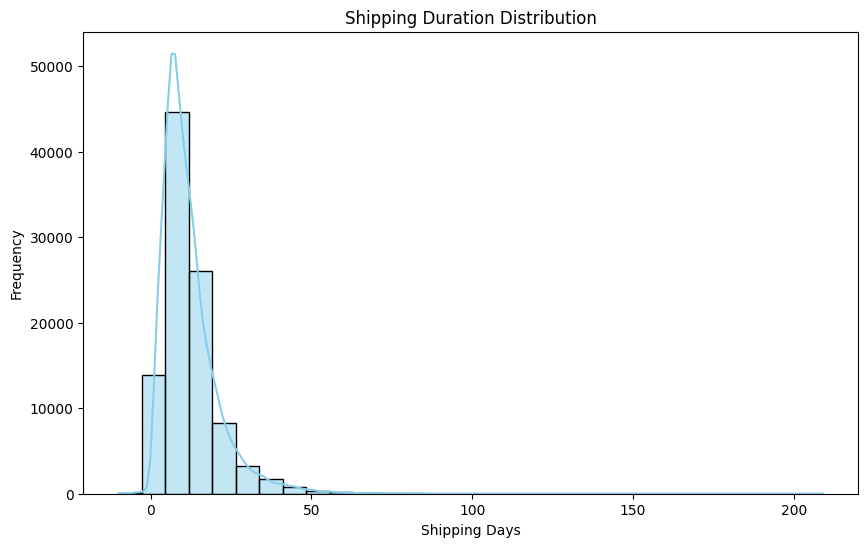

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_orders_customer['shipping_duration_days'], bins=30, kde=True, color='skyblue')
plt.title('Shipping Duration Distribution')
plt.xlabel('Shipping Days')
plt.ylabel('Frequency')
plt.show()

## Conclusion

- How does the geographical distribution of customers (based on customer_city or customer_state) affect the number of orders?
- What product categories show significant sales growth?
- How is the Shipping Duration Distribution from Purchase to Delivery?